In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('data/diabetes.csv')
df_name = df.columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

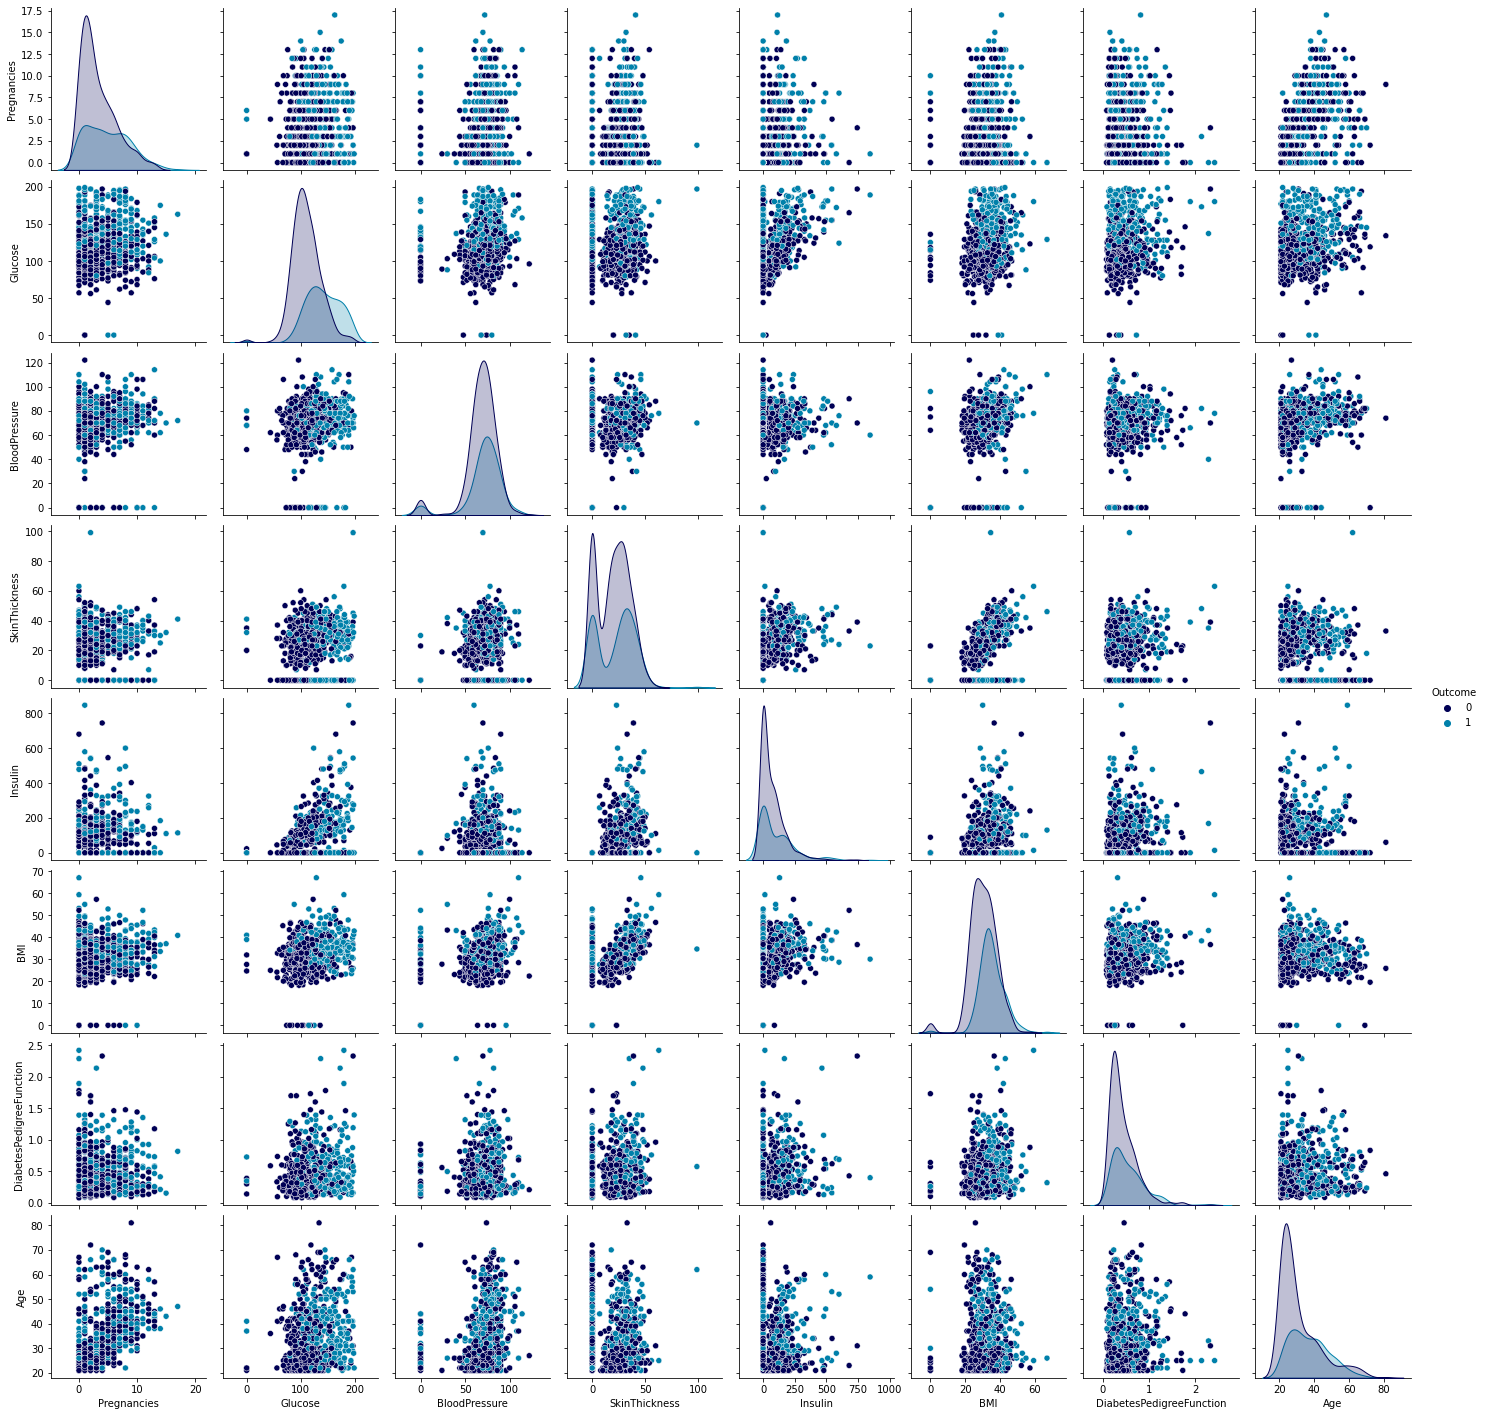

In [26]:
 g = sns.pairplot(df, hue="Outcome", palette="ocean")

<AxesSubplot:>

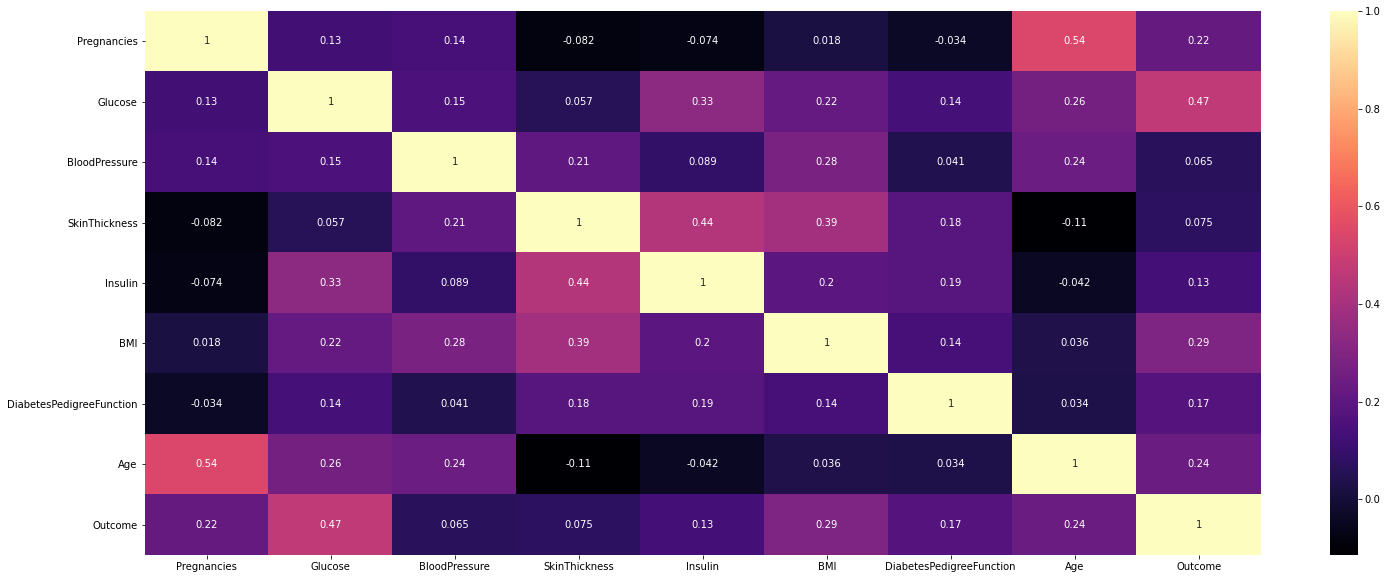

In [42]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True,cmap="magma")

In [29]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


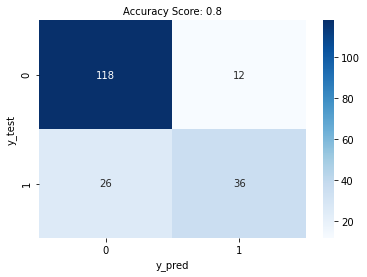

Testing score : 0.802
Training score : 0.764
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

train_score = accuracy_score(y_train, lr.predict(X_train))
test_score = accuracy_score(y_test, y_pred)


cfm = confusion_matrix(y_test,y_pred)
accuracy = round(accuracy_score(y_test, y_pred), 2)
sns.heatmap (cfm,annot=True,cmap='Blues',fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Accuracy Score: {0}'.format(accuracy), size=10)
plt.show()


print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test, y_pred))


Text(0, 0.5, 'Average model accuracy')

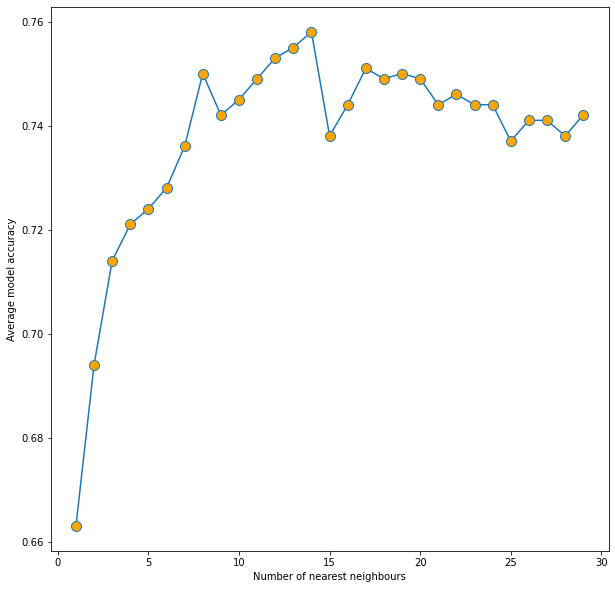

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list= range (1,30)
ave_scores = []
for k in k_list:
    knc = KNeighborsClassifier(n_neighbors= k)
    knc.fit(X_train, y_train)
    scores = cross_val_score(knc, X,y, cv= 5, scoring="accuracy")
    ave_scores.append(round(scores.mean(),3))

plt.grid   
plt.figure(figsize = (10,10)) 
plt.plot(k_list,ave_scores, marker='o', markerfacecolor='orange', markersize=10)
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Average model accuracy")



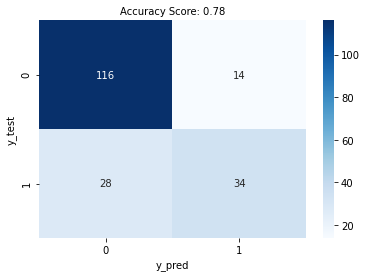

Testing score : 0.781
Training score : 0.767
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.55      0.62        62

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [34]:
knc = KNeighborsClassifier(n_neighbors= 15)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)


train_score = accuracy_score(y_train, knc.predict(X_train))
test_score = accuracy_score(y_test, y_pred)


cfm = confusion_matrix(y_test,y_pred)
accuracy = round(accuracy_score(y_test, y_pred), 2)
sns.heatmap (cfm,annot=True,cmap='Blues',fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Accuracy Score: {0}'.format(accuracy), size=10)
plt.show()


print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test,y_pred))



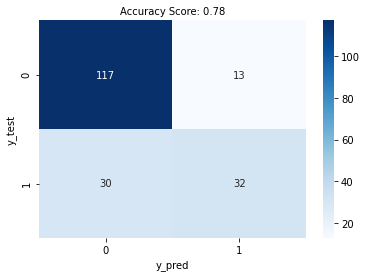

Testing score : 0.776
Training score : 0.825
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



In [35]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

train_score = accuracy_score(y_train, svc.predict(X_train))
test_score = accuracy_score(y_test, y_pred)

cfm = confusion_matrix(y_test,y_pred)
accuracy = round(accuracy_score(y_test, y_pred), 2)
sns.heatmap (cfm,annot=True,cmap='Blues',fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Accuracy Score: {0}'.format(accuracy), size=10)
plt.show()


print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test,y_pred))

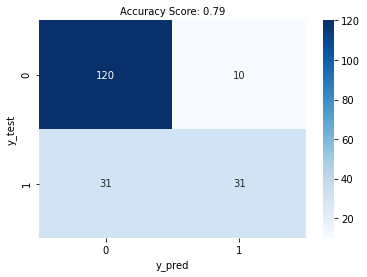

Testing score : 0.786
Training score : 0.800
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       130
           1       0.76      0.50      0.60        62

    accuracy                           0.79       192
   macro avg       0.78      0.71      0.73       192
weighted avg       0.78      0.79      0.77       192



In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, criterion = 'gini', max_depth = 3, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

train_score = accuracy_score(y_train, rf.predict(X_train))
test_score = accuracy_score(y_test, y_pred)

cfm = confusion_matrix(y_test,y_pred)
accuracy = round(accuracy_score(y_test, y_pred), 2)
sns.heatmap (cfm,annot=True,cmap='Blues',fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Accuracy Score: {0}'.format(accuracy), size=10)
plt.show()

print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test,y_pred))


In [74]:
lr_score = cross_val_score (lr,X,y,cv=10,scoring='accuracy')
knc_score = cross_val_score (knc,X,y,cv=10,scoring='accuracy')
svc_score = cross_val_score (svc,X,y,cv=10,scoring='accuracy')
rf_score = cross_val_score (rf,X,y,cv=10,scoring='accuracy')
print(lr_score)
print(knc_score)
print(svc_score)
print(rf_score)

[0.71428571 0.77922078 0.80519481 0.71428571 0.74025974 0.76623377
 0.81818182 0.80519481 0.75       0.82894737]
[0.75324675 0.7012987  0.68831169 0.62337662 0.71428571 0.76623377
 0.75324675 0.79220779 0.78947368 0.73684211]
[0.74025974 0.74025974 0.74025974 0.71428571 0.72727273 0.80519481
 0.75324675 0.80519481 0.76315789 0.78947368]
[0.76623377 0.71428571 0.74025974 0.7012987  0.71428571 0.79220779
 0.77922078 0.79220779 0.73684211 0.81578947]


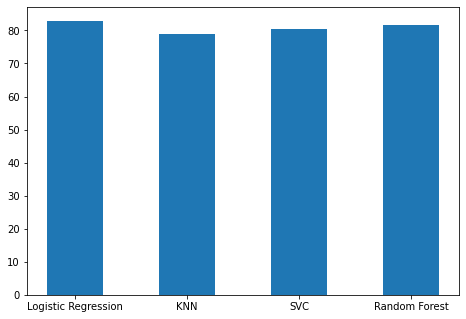

In [66]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Logistic Regression', 'KNN', 'SVC', 'Random Forest']
accuracies = [83,79,80.5,81.5]
ax.bar(models,accuracies ,width=0.5)

plt.show()